In [1]:
from google.colab import files

uploaded = files.upload()

Saving clean2.data to clean2.data


In [2]:
import pandas as pd
import io
  
df = pd.read_csv(io.BytesIO(uploaded['clean2.data']), header = None)
df.columns = ["f" + str(i) for i in range(-1, 168)]
df.rename(columns = {'f-1' : 'molecule_name', 'f0' : 'conformation_name', 'f167' : 'class'}, inplace = True)
df.head(5)

,molecule_name,conformation_name,f1,f2,f3,f4,f5,f6,f7,f8,f9,f10,f11,f12,f13,f14,f15,f16,f17,f18,f19,f20,f21,f22,f23,f24,f25,f26,f27,f28,f29,f30,f31,f32,f33,f34,f35,f36,f37,f38,...,f128,f129,f130,f131,f132,f133,f134,f135,f136,f137,f138,f139,f140,f141,f142,f143,f144,f145,f146,f147,f148,f149,f150,f151,f152,f153,f154,f155,f156,f157,f158,f159,f160,f161,f162,f163,f164,f165,f166,class
0,MUSK-211,211_1+1,46,-108,-60,-69,-117,49,38,-161,-8,5,-323,-220,-113,-299,-283,-307,-31,-106,-227,-42,-59,-22,-67,189,81,17,-27,-89,-67,105,-116,124,-106,5,-120,63,-165,40,...,81,-114,-187,45,-118,-75,-182,-234,-19,12,-13,-41,-119,-149,70,17,-20,-177,-101,-116,-14,-50,24,-81,-125,-114,-44,128,3,-244,-308,52,-7,39,126,156,-50,-112,96,1.0
1,MUSK-211,211_1+10,41,-188,-145,22,-117,-6,57,-171,-39,-100,-319,-111,-228,-281,-281,-300,54,-149,-98,-196,-27,-22,2,75,49,-34,45,-91,32,95,-116,85,-23,42,-58,61,-171,2,...,88,-21,-32,32,-128,-72,-124,-218,-94,53,-79,-20,-35,-26,4,50,17,-177,-102,-121,-66,-77,51,-41,-34,-32,-63,115,-5,-235,-59,-2,52,103,136,169,-61,-136,79,1.0
2,MUSK-211,211_1+11,46,-194,-145,28,-117,73,57,-168,-39,-22,-319,-111,-104,-283,-282,-303,52,-152,-97,-225,-28,-22,2,179,49,-33,46,-88,22,79,-116,19,-11,6,-38,71,-175,3,...,64,0,-23,-15,-129,-74,-125,-221,-93,53,-72,-19,-33,-26,3,49,17,-177,-102,-119,-66,-81,51,-41,-27,-41,-140,77,-163,-238,-134,-154,57,143,142,165,-67,-145,39,1.0
3,MUSK-211,211_1+12,41,-188,-145,22,-117,-7,57,-170,-39,-99,-319,-111,-228,-282,-281,-301,54,-150,-98,-196,-28,-22,2,77,48,-34,46,-91,32,94,-116,84,-23,41,-58,62,-171,3,...,88,-20,-32,32,-128,-73,-125,-220,-93,53,-78,-19,-34,-26,4,50,17,-177,-101,-121,-65,-77,52,-41,-34,-32,-66,115,-7,-236,-60,-4,52,104,136,168,-60,-135,80,1.0
4,MUSK-211,211_1+13,41,-188,-145,22,-117,-7,57,-170,-39,-99,-319,-111,-228,-282,-281,-301,54,-150,-98,-196,-28,-22,2,78,48,-34,46,-91,31,94,-116,84,-23,41,-58,62,-171,3,...,88,-20,-32,32,-128,-73,-125,-220,-93,53,-78,-19,-34,-26,4,50,17,-177,-101,-121,-65,-76,52,-41,-34,-32,-66,115,-8,-236,-60,-4,52,104,137,168,-60,-135,80,1.0


In [3]:
X = df.iloc[:,2:168]
Y = df.iloc[:,168]
print(X.shape)
print(Y.shape)

(6598, 166)
(6598,)


In [4]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.3, random_state = 0)
print(X_train.shape)
print(X_test.shape)

(4618, 166)
(1980, 166)


In [5]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
x_train_std = sc.fit_transform(X_train)
x_test_std = sc.fit_transform(X_test)

In [6]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA
lda=LDA()
lda.fit(x_train_std,Y_train)
x_train_lda=lda.transform(x_train_std)
x_test_lda=lda.transform(x_test_std)

In [7]:
from sklearn.naive_bayes import GaussianNB
gb = GaussianNB()
gb.fit(x_train_lda, Y_train)
pred_train1 = gb.predict(x_train_lda)
pred_test1 = gb.predict(x_test_lda)

In [8]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV

par={'n_neighbors':[1,3,5],
     'p':[1,2,3]}
gs=GridSearchCV(estimator=KNeighborsClassifier(),param_grid=par,scoring='accuracy')
gs.fit(x_train_lda,Y_train)
print("Best Training Score using hyperparameter tuning:-", gs.best_score_)

knn = KNeighborsClassifier(n_neighbors=gs.best_params_['n_neighbors'], p=gs.best_params_['p'])
knn.fit(x_train_lda, Y_train)
pred_train2 = knn.predict(x_train_lda)
pred_test2 = knn.predict(x_test_lda)

Best Training Score using hyperparameter tuning:- 0.9430489698095332


In [13]:
from sklearn.svm import SVC

par = {'C': [1, 10, 100], 
              'gamma': [1, 0.1, 0.01],
              'kernel': ['rbf']} 
gs=GridSearchCV(estimator=SVC(), param_grid=par, scoring='accuracy')
gs.fit(x_train_std,Y_train)
print("Best Training Score using hyperparameter tuning:-", gs.best_score_)

svm = SVC(C=gs.best_params_['C'], gamma=gs.best_params_['gamma'])
svm.fit(x_train_std, Y_train)
pred_train3 = svm.predict(x_train_std)
pred_test3 = svm.predict(x_test_std)

Best Training Score using hyperparameter tuning:- 0.9922056816423014


In [14]:
from sklearn.metrics import  accuracy_score
print("For Gaussian Naive Bayes:-")
print("Training Score - ", accuracy_score(Y_train, pred_train1))
print("Testing Score - ", accuracy_score(Y_test, pred_test1))
print()
print("For K Nearest Neighbors:-")
print("Training Score - ", accuracy_score(Y_train, pred_train2))
print("Testing Score - ", accuracy_score(Y_test, pred_test2))
print()
print("For Support Vector Machine:-")
print("Training Score - ", accuracy_score(Y_train, pred_train3))
print("Testing Score - ", accuracy_score(Y_test, pred_test3))

For Gaussian Naive Bayes:-
Training Score -  0.9495452576873106
Testing Score -  0.9388888888888889

For K Nearest Neighbors:-
Training Score -  0.9564746643568645
Testing Score -  0.9318181818181818

For Support Vector Machine:-
Training Score -  1.0
Testing Score -  0.9954545454545455


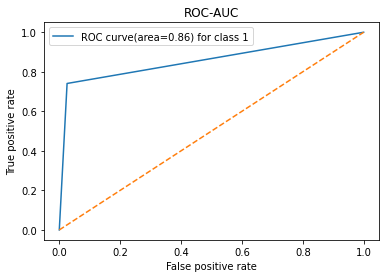

In [15]:
from sklearn.metrics import roc_curve,auc
fpr,tpr,_=roc_curve(Y_test,pred_test1)
area=auc(fpr,tpr)

import matplotlib.pyplot as plt
plt.plot(fpr,tpr,label='ROC curve(area=%.2f) for class 1'%area)
plt.plot([0,1],[0,1],ls='--')
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.title('ROC-AUC')
plt.legend()

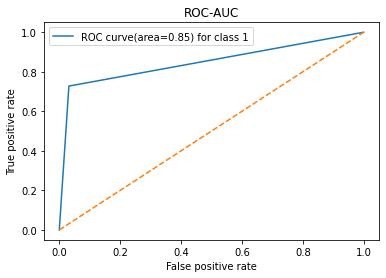

In [16]:
from sklearn.metrics import roc_curve,auc
fpr,tpr,_=roc_curve(Y_test,pred_test2)
area=auc(fpr,tpr)

import matplotlib.pyplot as plt
plt.plot(fpr,tpr,label='ROC curve(area=%.2f) for class 1'%area)
plt.plot([0,1],[0,1],ls='--')
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.title('ROC-AUC')
plt.legend()

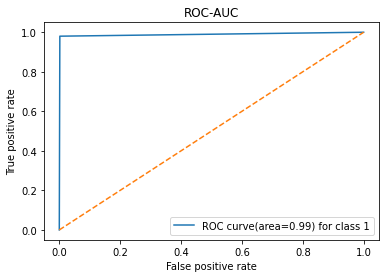

In [17]:
from sklearn.metrics import roc_curve,auc
fpr,tpr,_=roc_curve(Y_test,pred_test3)
area=auc(fpr,tpr)

import matplotlib.pyplot as plt
plt.plot(fpr,tpr,label='ROC curve(area=%.2f) for class 1'%area)
plt.plot([0,1],[0,1],ls='--')
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.title('ROC-AUC')
plt.legend()

              precision    recall  f1-score   support

         0.0       0.97      0.95      0.96      1714
         1.0       0.74      0.84      0.79       266

    accuracy                           0.94      1980
   macro avg       0.86      0.90      0.88      1980
weighted avg       0.94      0.94      0.94      1980



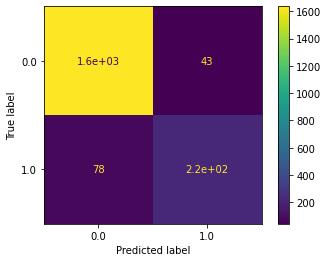

In [18]:
from sklearn.metrics import classification_report
from sklearn.metrics import plot_confusion_matrix
cpr1 = classification_report(pred_test1, Y_test)
print(cpr1)
cp1 = plot_confusion_matrix(gb, x_test_lda, Y_test)

              precision    recall  f1-score   support

         0.0       0.97      0.95      0.96      1708
         1.0       0.73      0.81      0.76       272

    accuracy                           0.93      1980
   macro avg       0.85      0.88      0.86      1980
weighted avg       0.94      0.93      0.93      1980



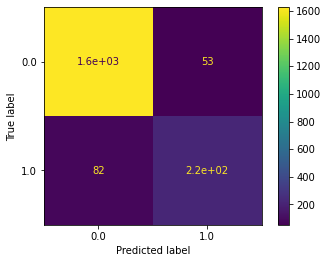

In [19]:
cpr2 = classification_report(pred_test2, Y_test)
print(cpr2)
cp2 = plot_confusion_matrix(knn, x_test_lda, Y_test)

              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00      1682
         1.0       0.98      0.99      0.98       298

    accuracy                           1.00      1980
   macro avg       0.99      0.99      0.99      1980
weighted avg       1.00      1.00      1.00      1980



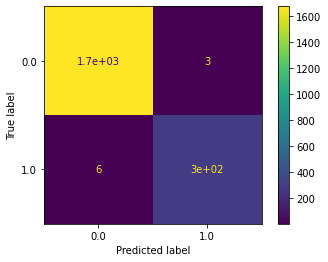

In [20]:
cpr3 = classification_report(pred_test3, Y_test)
print(cpr3)
cp3 = plot_confusion_matrix(svm, x_test_std, Y_test)

In [21]:
from sklearn.model_selection import cross_val_score
import numpy as np
scores = cross_val_score(gb, X, Y, cv = 5)
print(scores)
print(f'Over all performance Gaussian Naive Bayes is :- {np.mean(scores)} +/- {np.std(scores)}')

[0.71060606 0.70454545 0.70378788 0.85822593 0.92191054]
Over all performance Gaussian Naive Bayes is :- 0.7798151721919727 +/- 0.09227667166785591


In [22]:
scores = cross_val_score(knn, X, Y, cv = 5)
print(scores)
print(f'Over all performance K Nearest Neighbors is :- {np.mean(scores)} +/- {np.std(scores)}')

[0.69545455 0.59166667 0.71136364 0.89537528 0.9727066 ]
Over all performance K Nearest Neighbors is :- 0.7733133457394261 +/- 0.1396796766536886


In [23]:
scores = cross_val_score(svm, X, Y, cv = 5)
print(scores)
print(f'Over all performance for Support Vector Machine is :- {np.mean(scores)} +/- {np.std(scores)}')

[0.85       0.85151515 0.8469697  0.84609553 0.84609553]
Over all performance for Support Vector Machine is :- 0.8481351804627014 +/- 0.002217227150714773


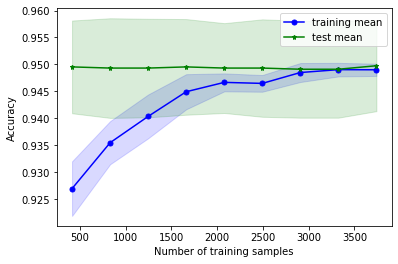

In [24]:
from sklearn.model_selection import learning_curve
import matplotlib.pyplot as plt
import numpy as np
train_sizes,train_score,test_score=learning_curve(estimator=gb,
                                                 X=x_train_lda,y=Y_train,
                  train_sizes=[0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9],cv=10)
train_mean=np.mean(train_score,axis=1)
test_mean=np.mean(test_score,axis=1)
train_std=np.std(train_score,axis=1)
test_std=np.std(test_score,axis=1)

plt.figure()
plt.plot(train_sizes,train_mean,c='b',marker='o',markersize=5,label='training mean')
plt.fill_between(train_sizes,train_mean+train_std,train_mean-train_std,color='b',alpha=0.15)
plt.plot(train_sizes,test_mean,c='g',marker='*',markersize=5,label='test mean')
plt.fill_between(train_sizes,test_mean+test_std,test_mean-test_std,color='g',alpha=0.15)
plt.legend()
plt.xlabel('Number of training samples')
plt.ylabel('Accuracy')
plt.show()

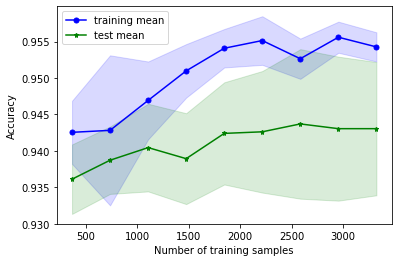

In [25]:
from sklearn.model_selection import learning_curve
import matplotlib.pyplot as plt
import numpy as np
train_sizes,train_score,test_score=learning_curve(estimator=knn,
                                                 X=x_train_lda,y=Y_train,
                  train_sizes=[0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9],cv=5)
train_mean=np.mean(train_score,axis=1)
test_mean=np.mean(test_score,axis=1)
train_std=np.std(train_score,axis=1)
test_std=np.std(test_score,axis=1)

plt.figure()
plt.plot(train_sizes,train_mean,c='b',marker='o',markersize=5,label='training mean')
plt.fill_between(train_sizes,train_mean+train_std,train_mean-train_std,color='b',alpha=0.15)
plt.plot(train_sizes,test_mean,c='g',marker='*',markersize=5,label='test mean')
plt.fill_between(train_sizes,test_mean+test_std,test_mean-test_std,color='g',alpha=0.15)
plt.legend()
plt.xlabel('Number of training samples')
plt.ylabel('Accuracy')
plt.show()

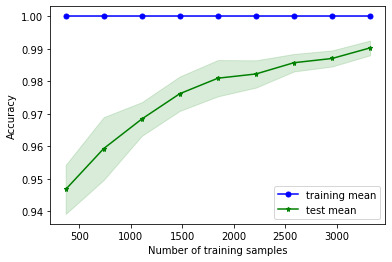

In [26]:
from sklearn.model_selection import learning_curve
import matplotlib.pyplot as plt
import numpy as np
train_sizes,train_score,test_score=learning_curve(estimator=svm,
                                                 X=x_train_std,y=Y_train,
                  train_sizes=[0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9],cv=5)
train_mean=np.mean(train_score,axis=1)
test_mean=np.mean(test_score,axis=1)
train_std=np.std(train_score,axis=1)
test_std=np.std(test_score,axis=1)

plt.figure()
plt.plot(train_sizes,train_mean,c='b',marker='o',markersize=5,label='training mean')
plt.fill_between(train_sizes,train_mean+train_std,train_mean-train_std,color='b',alpha=0.15)
plt.plot(train_sizes,test_mean,c='g',marker='*',markersize=5,label='test mean')
plt.fill_between(train_sizes,test_mean+test_std,test_mean-test_std,color='g',alpha=0.15)
plt.legend()
plt.xlabel('Number of training samples')
plt.ylabel('Accuracy')
plt.show()